# $(g-2)_\tau$ with ALPs

1911.06279

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

import particle.literals
from scipy.integrate import quad
import pandas as pd
import flavio

## Universal scenario

In [2]:
me = particle.literals.e_minus.mass
mmu = particle.literals.mu_minus.mass
mtau = particle.literals.tau_minus.mass
mZ = particle.literals.Z_0.mass/1000
mlep = [me/1000, mmu/1000, mtau/1000]
fa = 1000
#alpha_e = 1/137.035999084
#alpha_e_lep = [0.007425395650525988, 0.00782891226248143, 0.008124790150110821] #alpha_em computed with flavio at mu=m_lep
s2W = 0.23121
alpha_e = flavio.physics.running.running.get_alpha_e(flavio.default_parameters.get_central_all(), fa)

In [3]:
ma = [10**x for x in np.linspace(-3, 0, 300)] + [10**x for x in np.linspace(0, 3, 100)]

In [4]:
def sqrt(x):
    if np.real(x) > 0:
        return np.sqrt(x)
    else:
        res = np.sqrt(x)
        if np.imag(res) < 0:
            return -res
        else:
            return res

def h1(x0):
    if x0 > 6e3:
        return (-11+6*np.log(x0))/(3*x0)
    x = x0*(1+1e-8*1j)
    return np.real(1+2*x-x*(x-1)*np.log(x)+2*x*(x-3)*np.sqrt(x/(x-4))*np.log(0.5*(np.sqrt(x)+np.sqrt(x-4))))

In [5]:
20**2/mlep[1]**2

35830.439318315046

In [6]:
2**2/mlep[0]**2

15318631.739334758

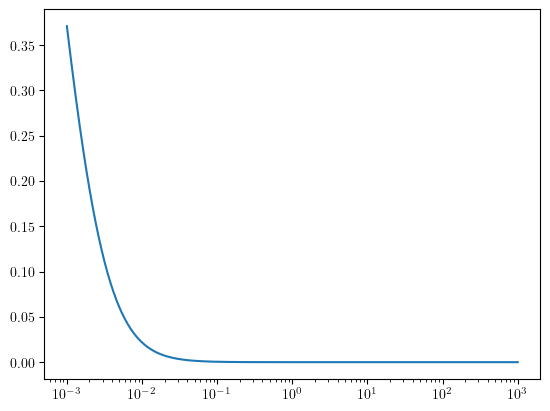

In [7]:
plt.semilogx(ma, [h1(m**2/mlep[0]**2) for m in ma])

In [8]:
def h2(x0):
    if x0 > 6e3:
        return 1.5+np.log(x0)
    x = x0*(1+1e-8*1j)
    if x0 < 4:
        return 1+x**2/6*np.log(x)-x/3+(x+2)/3*sqrt(x*(4-x))*np.arccos(sqrt(x)/2)
    else:
        return 1+x**2/6*np.log(x)-x/3+(x+2)/3*sqrt(x*(x-4))*np.log(sqrt(x)/2-sqrt(0.25*x-1))

In [10]:
def F(y, x):
    return 1/(1-y)*(h2(x)-h2(x/y))

In [11]:
def intF(ma, mlep, mloop):
    return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]

/home/jorge/.local/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/tmp/ipykernel_6380/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


(0.001, 10)

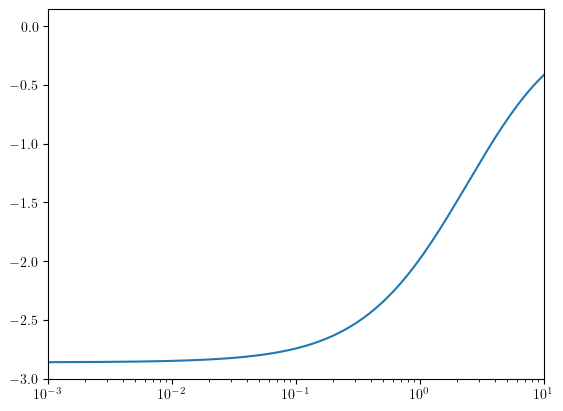

In [12]:
plt.semilogx(ma, [intF(m, 1.7, 1.7) for m in ma])
plt.xlim([0.001, 10])

/tmp/ipykernel_155315/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


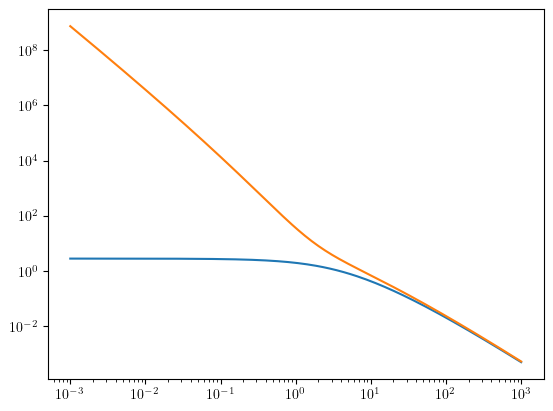

In [21]:
plt.loglog(ma, [-intF(m, mlep[2], mlep[2]) for m in ma])
plt.loglog(ma, [mlep[2]**2/m**2*(np.log(m**2/mlep[2]**2)**2+np.pi**3/3) for m in ma])

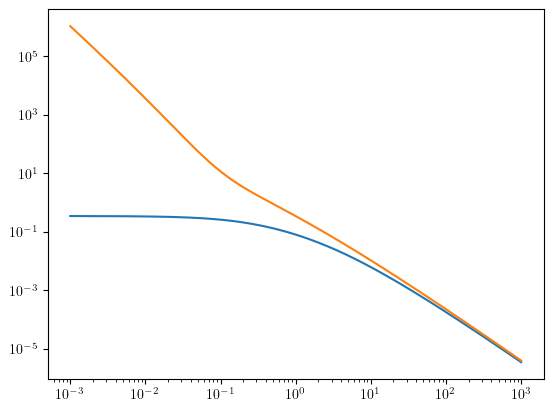

In [22]:
plt.loglog(ma, [-intF(m, mlep[2], mlep[1]) for m in ma])
plt.loglog(ma, [mlep[1]**2/m**2*(np.log(m**2/mlep[1]**2)**2+np.pi**3/3) for m in ma])

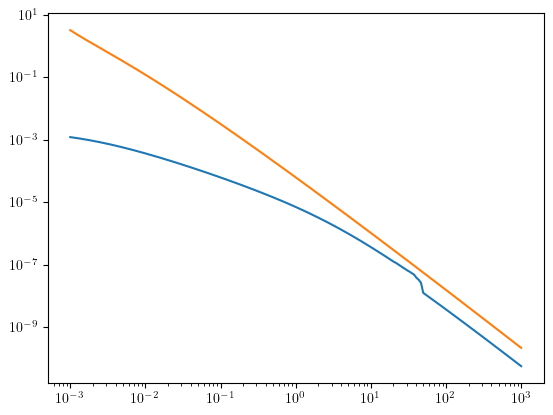

In [23]:
plt.loglog(ma, [-intF(m, mlep[2], mlep[0]) for m in ma])
plt.loglog(ma, [mlep[0]**2/m**2*(np.log(m**2/mlep[0]**2)**2+np.pi**3/3) for m in ma])

/tmp/ipykernel_155315/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


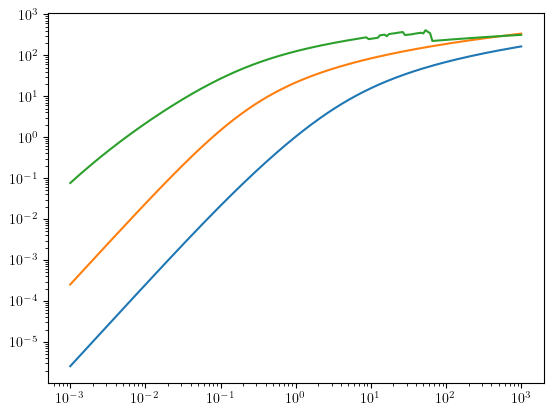

In [24]:
plt.loglog(ma, [-intF(m, mlep[1], mlep[2])/mlep[2]**2*m**2 for m in ma])
plt.loglog(ma, [-intF(m, mlep[1], mlep[1])/mlep[1]**2*m**2 for m in ma])
plt.loglog(ma, [-intF(m, mlep[1], mlep[0])/mlep[0]**2*m**2 for m in ma])

/tmp/ipykernel_155315/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


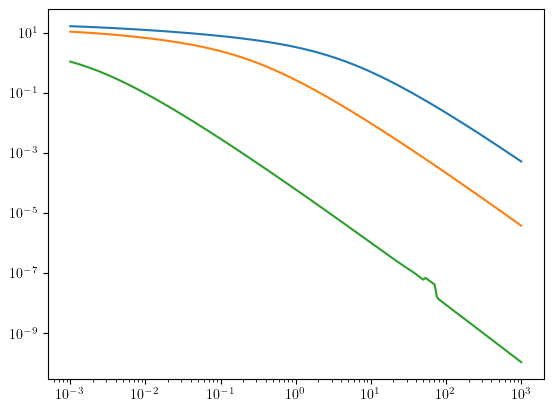

In [25]:
plt.loglog(ma, [-intF(m, mlep[0], mlep[2]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[0], mlep[1]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[0], mlep[0]) for m in ma])

/tmp/ipykernel_155315/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


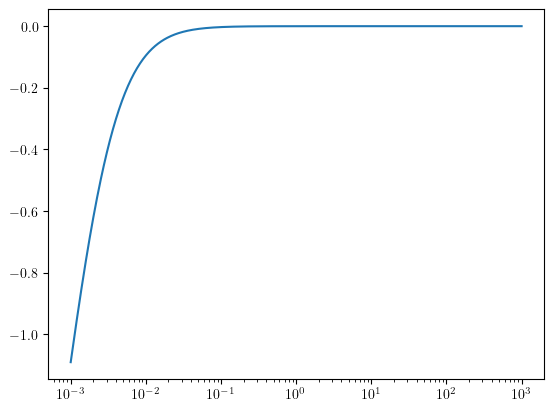

In [26]:
plt.semilogx(ma, [intF(m, mlep[0], mlep[0]) for m in ma])

/tmp/ipykernel_155315/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


Text(0, 0.5, '$|\\Delta a_e/c_{\\ell\\ell}^2|$')

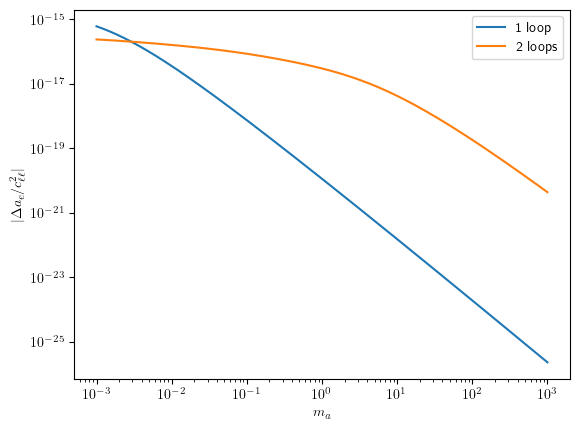

In [27]:
plt.loglog(ma, [mlep[0]**2/(4*np.pi*fa)**2*h1(m**2/mlep[0]**2) for m in ma], label='1 loop')
plt.loglog(ma, [-mlep[0]**2/(4*np.pi*fa)**2*2*alpha_e/np.pi*sum(intF(m, mlep[0], mlep[i]) for i in range(3)) for m in ma], label='2 loops')
plt.legend()
plt.xlabel(r'$m_a$')
plt.ylabel(r'$|\Delta a_e/c_{\ell\ell}^2|$')

/tmp/ipykernel_155315/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


Text(0, 0.5, '$|\\Delta a_\\mu/c_{\\ell\\ell}^2|$')

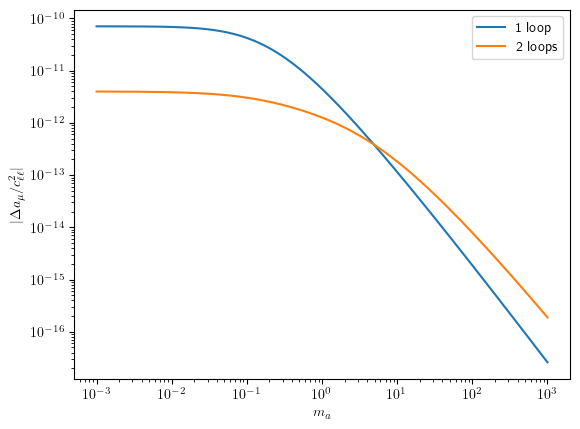

In [28]:
plt.loglog(ma, [mlep[1]**2/(4*np.pi*fa)**2*h1(m**2/mlep[1]**2) for m in ma], label='1 loop')
plt.loglog(ma, [-mlep[1]**2/(4*np.pi*fa)**2*2*alpha_e/np.pi*sum(intF(m, mlep[1], mlep[i]) for i in range(3)) for m in ma], label='2 loops')
plt.legend()
plt.xlabel(r'$m_a$')
plt.ylabel(r'$|\Delta a_\mu/c_{\ell\ell}^2|$')

In [58]:
def alep(ma, fa=1000):
    a = [0, 0, 0]
    for i in range(3):
        x = ma**2/mlep[i]**2
        #integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, x), 0, 1)[0] for j in range(3))
        integral = quad(lambda z: np.log(z*(1-z)*ma**2/mtau**2)/(1-z*(1-z)*ma**2/mtau**2), 0, 1)[0]
        a[i] -= h1(x) # lepton-lepton-ALP loop
        a[i] -= 2*alpha_e/np.pi*integral # 2 loops
        a[i] *= mlep[i]**2/(4*np.pi*fa)**2
    return a

In [55]:
def amu_1loop(ma, fa=1000):
    x = ma**2/mtau**2
    return -mtau**2/(4*np.pi*fa)**2*h1(x)

def amu_2loop(ma, fa=1000):
    x = ma**2/mtau**2
    integral = quad(lambda z: np.log(z*(1-z)*ma**2/mtau**2)/(z*(1-z)*ma**2/mtau**2-1), 0, 1)[0]
    return 2*alpha_e/np.pi*integral*mtau**2/(4*np.pi*fa)**2

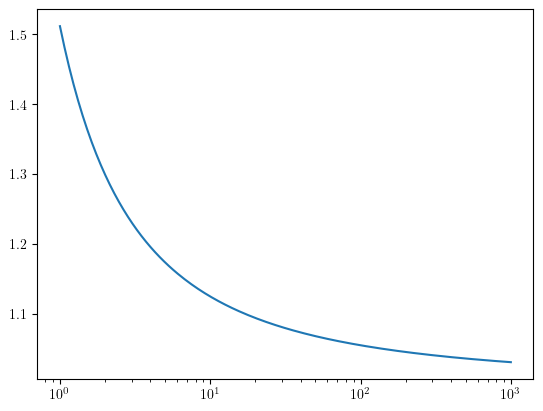

In [89]:
plt.semilogx([10**x for x in np.linspace(0, 3, 200)], [(np.log(mmu**2/10**(2*x))**2+np.pi**3/3)/np.log(mmu**2/10**(2*x))**2 for x in np.linspace(0, 3, 200)])

In [59]:
alist = [alep(m) for m in ma]

In [60]:
ae = [a[0] for a in alist]
amu = [a[1] for a in alist]
atau = [a[2] for a in alist]

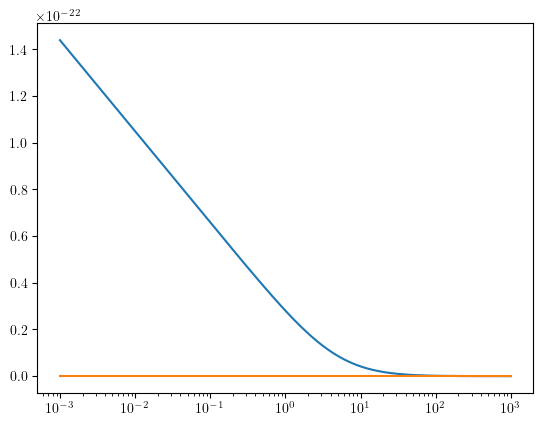

In [61]:
plt.semilogx(ma, [np.real(a) for a in ae])
plt.semilogx(ma, [np.imag(a) for a in ae])

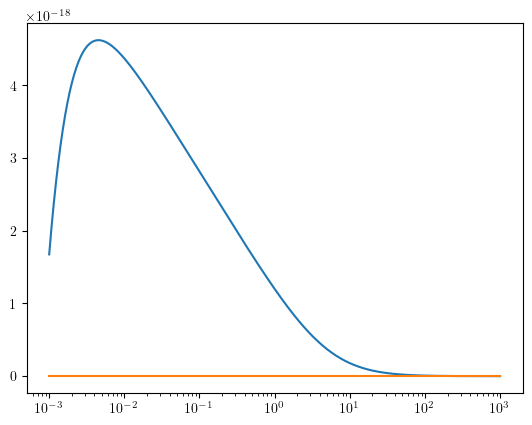

In [62]:
plt.semilogx(ma, [np.real(a) for a in amu])
plt.semilogx(ma, [np.imag(a) for a in amu])

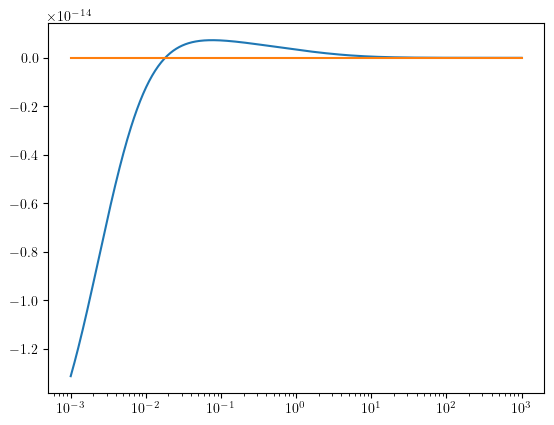

In [63]:
plt.semilogx(ma, [np.real(a) for a in atau])
plt.semilogx(ma, [np.imag(a) for a in atau])

In [64]:
atau_SM = 117721e-8+5e-8 # hep-ph/0701260

atau_ATLASPb = -0.019 # 2307.15160
atau_ATLASpair = -1.8e-3 # 2307.14133
atau_CMS = 0.01-0.089 # 2206.05192

atau_CMS24 = -2.2e-3 #2405.05977

bound_ATLASPb = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau)))
bound_ATLASpair = np.sqrt((atau_ATLASpair-atau_SM)/np.real(np.array(atau)))
bound_CMS = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau)))
bound_CMS24 = np.sqrt((atau_CMS24-atau_SM)/np.real(np.array(atau)))
bound_BelleII = np.sqrt(-1e-6/np.real(np.array(atau))) # 0807.2366


/tmp/ipykernel_6380/914121842.py:9: RuntimeWarning: invalid value encountered in sqrt
  bound_ATLASPb = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau)))
/tmp/ipykernel_6380/914121842.py:10: RuntimeWarning: invalid value encountered in sqrt
  bound_ATLASpair = np.sqrt((atau_ATLASpair-atau_SM)/np.real(np.array(atau)))
/tmp/ipykernel_6380/914121842.py:11: RuntimeWarning: invalid value encountered in sqrt
  bound_CMS = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau)))
/tmp/ipykernel_6380/914121842.py:12: RuntimeWarning: invalid value encountered in sqrt
  bound_CMS24 = np.sqrt((atau_CMS24-atau_SM)/np.real(np.array(atau)))
/tmp/ipykernel_6380/914121842.py:13: RuntimeWarning: invalid value encountered in sqrt
  bound_BelleII = np.sqrt(-1e-6/np.real(np.array(atau))) # 0807.2366


In [65]:
amu_SM   = 116591810e-11-43e-11 # 2006.04822
amu_WA24 = 116592059e-11+22e-11 # 2402.15410

amu_SM_m = 116591810e-11+43e-11
amu_WA24_m = 116592059e-11-22e-11

amu_SM_2   = 116591810e-11-2*43e-11 # 2006.04822
amu_WA24_2 = 116592059e-11+2*22e-11

amu_SM_2m = 116591810e-11+2*43e-11
amu_WA24_2m = 116592059e-11-2*22e-11

In [66]:
bound_amu_WA24 = []
bound_amu_WA24_m = []
bound_amu_WA24_2 = []
bound_amu_WA24_2m = []
for m, a in zip(ma, amu):
    if np.real(a) > 0:
        bound_amu_WA24.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
    else:
        bound_amu_WA24.append(float('nan'))
        bound_amu_WA24_m.append(float('nan'))
        bound_amu_WA24_2.append(float('nan'))
        bound_amu_WA24_2m.append(float('nan'))

In [67]:
ae_exp_p  = 0.00115965218059 + 13e-14 #2209.13084
ae_exp_m  = 0.00115965218059 - 13e-14
ae_Cs =     0.00115965218161 + 23e-14 #1812.04130
ae_8Be =    0.001159652180252 - 9.5e-14 #DOI:10.1038/s41586-020-2964-7

In [68]:
0.00115965218059-0.001159652181547

-9.57000104162553e-13

In [69]:
ma_ae_Cs = []
ma_ae_8Be = []
bound_ae_Cs = []
bound_ae_8Be = []
for m, a in zip(ma, ae):
    if np.real(a) < 0 and m < 2e-2:
        bound_ae_Cs.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        ma_ae_Cs.append(m)
    else:
        bound_ae_8Be.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        ma_ae_8Be.append(m)


In [78]:
mmu

0.1056583755

### Including gauge couplings

In [70]:
def alep_gauge(ma, cgg, cgZ, fa=1000):
    mu=4*np.pi*fa
    return [mlep[i]**2/fa**2*alpha_e/(8*np.pi**3)*(cgg*(np.log(mu**2/mlep[i]**2)-h2(ma**2/mlep[i]**2))+cgZ*(1-4*s2W)/8*(np.log(mu**2/mZ**2)-1.5) ) for i in range(3)]

In [71]:
alist_gg = [alep_gauge(m, 1, 0) for m in ma]
alist_gZ = [alep_gauge(m, 0, 1) for m in ma]

In [72]:
c2W = 1-s2W
ae = np.array(ae) - 3*np.array([a[0] for a in alist_gg]) - 3*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*np.array([a[0] for a in alist_gZ])
amu = np.array(amu) - 3*np.array([a[1] for a in alist_gg]) - 3*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*np.array([a[1] for a in alist_gZ])
atau = np.array(atau) - 3*np.array([a[2] for a in alist_gg]) - 3*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*np.array([a[2] for a in alist_gZ])

In [73]:
bound_ATLASPb = np.sqrt(-(atau_ATLASPb-atau_SM)/abs(np.real(np.array(atau))))
bound_ATLASpair = np.sqrt(-(atau_ATLASpair-atau_SM)/abs(np.real(np.array(atau))))
bound_CMS = np.sqrt(-(atau_CMS-atau_SM)/abs(np.real(np.array(atau))))
bound_BelleII = np.sqrt(1e-6/abs(np.real(np.array(atau)))) # 0807.2366

In [74]:
bound_amu_WA24 = []
bound_amu_WA24_m = []
bound_amu_WA24_2 = []
bound_amu_WA24_2m = []
for m, a in zip(ma, amu):
    if np.real(a) > 0:
        bound_amu_WA24.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
    else:
        bound_amu_WA24.append(float('nan'))
        bound_amu_WA24_m.append(float('nan'))
        bound_amu_WA24_2.append(float('nan'))
        bound_amu_WA24_2m.append(float('nan'))

In [75]:
bound_ae_Cs = []
bound_ae_8Be = []
for m, a in zip(ma, ae):
    if np.real(a) < 0:
        bound_ae_Cs.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        bound_ae_8Be.append(float('nan'))
        #ma_ae_Cs_gZ5m.append(m)
    else:
        bound_ae_8Be.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        bound_ae_Cs.append(float('nan'))
        #ma_ae_8Be_gZ5m.append(m)

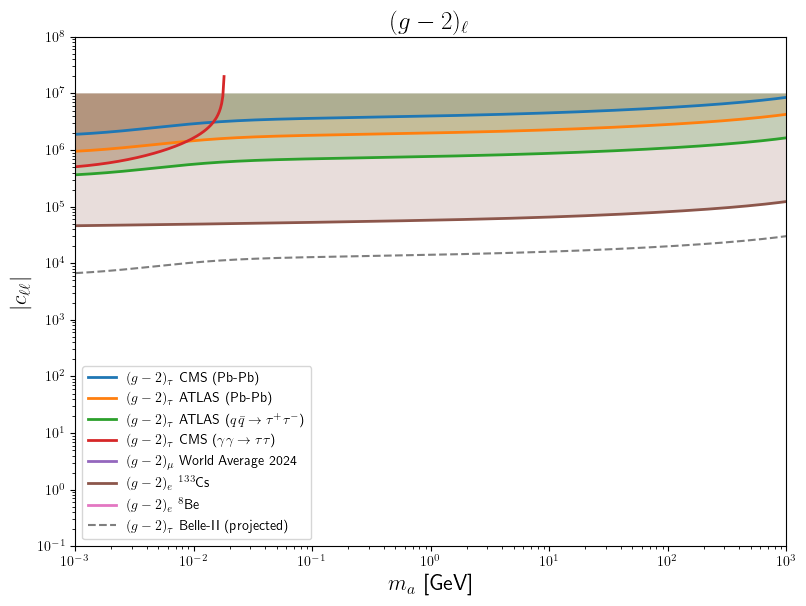

In [77]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ma, bound_CMS, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_CMS, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASPb, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_ATLASPb, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(ma, bound_ATLASpair, 1e7, alpha=0.2)
plt.plot(ma, bound_CMS24, label=r'$(g-2)_\tau$ CMS ($\gamma\gamma\to\tau\tau$)', lw=2)
plt.fill_between(ma, bound_CMS24, 1e7, alpha=0.2)


plt.plot(ma, bound_amu_WA24, label=r'$(g-2)_\mu$ World Average 2024', lw=2)
plt.fill_between(ma, bound_amu_WA24, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_Cs, label=r'$(g-2)_e$ ${}^{133}$Cs', lw=2)
plt.fill_between(ma, bound_ae_Cs, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_8Be, label=r'$(g-2)_e$ ${}^{8}$Be', lw=2)
plt.fill_between(ma, bound_ae_8Be, 1e7, alpha=0.2)

plt.plot(ma, bound_BelleII, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')



plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\ell$', fontsize=18)
plt.xlim(1e-3, 1e3)
plt.ylim(0.1, 1e8)
plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('g2_lim.png')

In [33]:
pd.DataFrame({'ma_GeV': ma, 'c_g2tau_ATLAS': bound_ATLASpair, 'c_g2tau_BelleII': bound_BelleII, 'c_g2tau_ATLASPb': bound_ATLASPb, 'c_g2tau_CMS': bound_CMS, 'c_g2tau_CMS24': bound_CMS24}).to_csv('../data/anomalous_moments/g2tau_lfu.csv', index=False)
pd.DataFrame({'ma_GeV': ma, 'c_g2e': bound_ae_Cs}).to_csv('../data/anomalous_moments/g2e_Cs.csv', index=False)
pd.DataFrame({'ma_GeV': ma, 'c_g2e': bound_ae_8Be}).to_csv('../data/anomalous_moments/g2e_Be.csv', index=False)
pd.DataFrame({'ma_GeV': ma, 'c_g2mu': bound_amu_WA24}).to_csv('../data/anomalous_moments/g2mu.csv', index=False)

In [34]:
ae_gg5p = np.array(ae) + 5*np.array([a[0] for a in alist_gg])
amu_gg5p = np.array(amu) +5* np.array([a[1] for a in alist_gg])
atau_gg5p = np.array(atau) +5* np.array([a[2] for a in alist_gg])

In [35]:
bound_ATLASPb_gg5p = np.sqrt(-(atau_ATLASPb-atau_SM)/abs(np.real(np.array(atau_gg5p))))
bound_ATLASpair_gg5p = np.sqrt(-(atau_ATLASpair-atau_SM)/abs(np.real(np.array(atau_gg5p))))
bound_CMS_gg5p = np.sqrt(-(atau_CMS-atau_SM)/abs(np.real(np.array(atau_gg5p))))
bound_BelleII_gg5p = np.sqrt(1e-6/abs(np.real(np.array(atau_gg5p)))) # 0807.2366

In [43]:
bound_amu_WA24_gg5p = []
bound_amu_WA24_m_gg5p = []
bound_amu_WA24_2_gg5p = []
bound_amu_WA24_2m_gg5p = []
for m, a in zip(ma, amu_gg5p):
    if np.real(a) > 0:
        bound_amu_WA24_gg5p.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m_gg5p.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2_gg5p.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m_gg5p.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
    else:
        bound_amu_WA24_gg5p.append(float('nan'))
        bound_amu_WA24_m_gg5p.append(float('nan'))
        bound_amu_WA24_2_gg5p.append(float('nan'))
        bound_amu_WA24_2m_gg5p.append(float('nan'))

In [44]:
bound_ae_Cs_gg5p = []
bound_ae_8Be_gg5p = []
for m, a in zip(ma, ae_gg5p):
    if np.real(a) < 0:
        bound_ae_Cs_gg5p.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        bound_ae_8Be_gg5p.append(float('nan'))
        #ma_ae_Cs_gZ5m.append(m)
    else:
        bound_ae_8Be_gg5p.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        bound_ae_Cs_gg5p.append(float('nan'))
        #ma_ae_8Be_gZ5m.append(m)

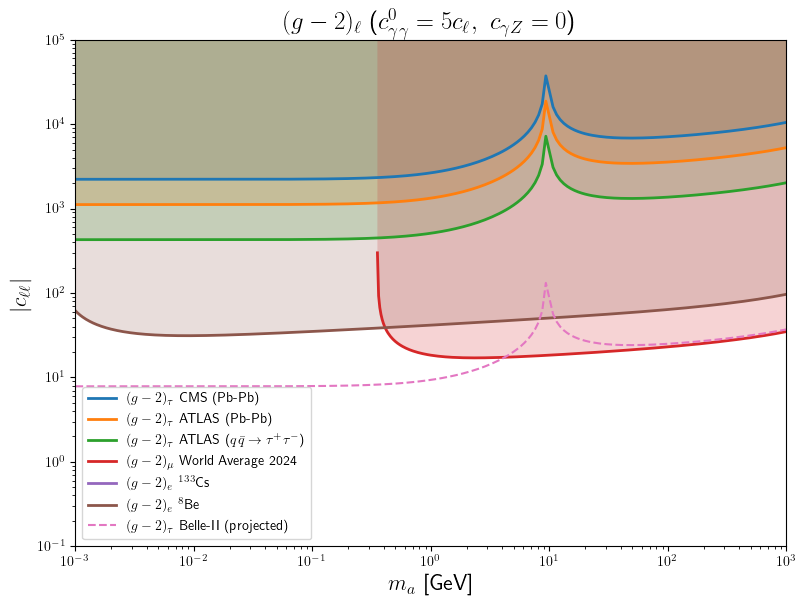

In [45]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ma, bound_CMS_gg5p, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_CMS_gg5p, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASPb_gg5p, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_ATLASPb_gg5p, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair_gg5p, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(ma, bound_ATLASpair_gg5p, 1e7, alpha=0.2)



plt.plot(ma, bound_amu_WA24_gg5p, label=r'$(g-2)_\mu$ World Average 2024', lw=2)
plt.fill_between(ma, bound_amu_WA24_gg5p, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_Cs_gg5p, label=r'$(g-2)_e$ ${}^{133}$Cs', lw=2)
plt.fill_between(ma, bound_ae_Cs_gg5p, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_8Be_gg5p, label=r'$(g-2)_e$ ${}^{8}$Be', lw=2)
plt.fill_between(ma, bound_ae_8Be_gg5p, 1e7, alpha=0.2)

plt.plot(ma, bound_BelleII_gg5p, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')



plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\ell$ ($c_{\gamma\gamma}^0 = 5 c_\ell,\ c_{\gamma Z}=0$)', fontsize=18)
plt.xlim(1e-3, 1e3)
plt.ylim(0.1, 1e5)
plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
#plt.savefig('g2_lim_gg5p.png')

In [46]:
ae_gg5m = np.array(ae) - 5*np.array([a[0] for a in alist_gg])
amu_gg5m = np.array(amu) - 5*np.array([a[1] for a in alist_gg])
atau_gg5m = np.array(atau) - 5*np.array([a[2] for a in alist_gg])

In [47]:
bound_ATLASPb_gg5m = np.sqrt(-(atau_ATLASPb-atau_SM)/abs(np.real(np.array(atau_gg5m))))
bound_ATLASpair_gg5m = np.sqrt(-(atau_ATLASpair-atau_SM)/abs(np.real(np.array(atau_gg5m))))
bound_CMS_gg5m = np.sqrt(-(atau_CMS-atau_SM)/abs(np.real(np.array(atau_gg5m))))
bound_BelleII_gg5m = np.sqrt(1e-6/abs(np.real(np.array(atau_gg5m)))) # 0807.2366

In [48]:
bound_amu_WA24_gg5m = []
bound_amu_WA24_m_gg5m = []
bound_amu_WA24_2_gg5m = []
bound_amu_WA24_2m_gg5m = []
for m, a in zip(ma, amu_gg5m):
    if np.real(a) > 0:
        bound_amu_WA24_gg5m.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m_gg5m.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2_gg5m.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m_gg5m.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
    else:
        bound_amu_WA24_gg5m.append(float('nan'))
        bound_amu_WA24_m_gg5m.append(float('nan'))
        bound_amu_WA24_2_gg5m.append(float('nan'))
        bound_amu_WA24_2m_gg5m.append(float('nan'))
        

In [49]:
bound_ae_Cs_gg5m = []
bound_ae_8Be_gg5m = []
for m, a in zip(ma, ae_gg5m):
    if np.real(a) < 0:
        bound_ae_Cs_gg5m.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        bound_ae_8Be_gg5m.append(float('nan'))
        #ma_ae_Cs_gZ5m.append(m)
    else:
        bound_ae_8Be_gg5m.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        bound_ae_Cs_gg5m.append(float('nan'))
        #ma_ae_8Be_gZ5m.append(m)

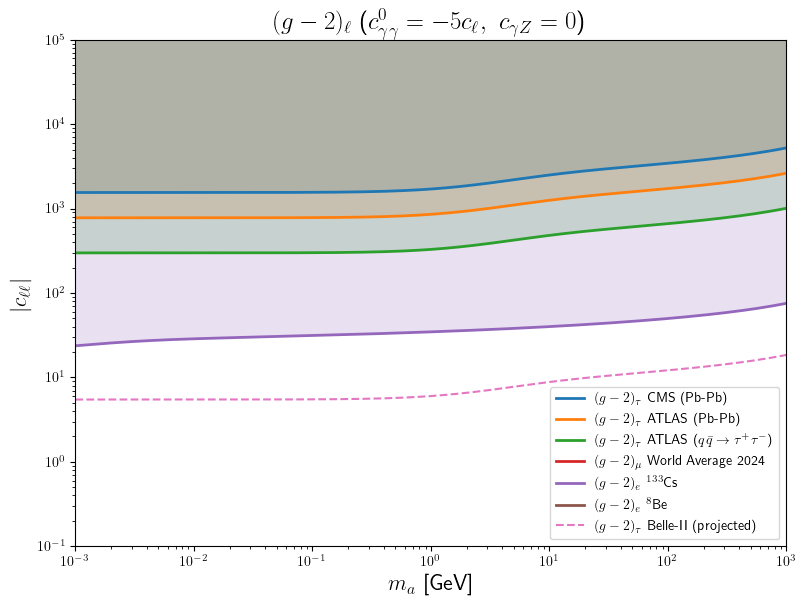

In [50]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ma, bound_CMS_gg5m, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_CMS_gg5m, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASPb_gg5m, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_ATLASPb_gg5m, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair_gg5m, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(ma, bound_ATLASpair_gg5m, 1e7, alpha=0.2)



plt.plot(ma, bound_amu_WA24_gg5m, label=r'$(g-2)_\mu$ World Average 2024', lw=2)
plt.fill_between(ma, bound_amu_WA24_gg5m, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_Cs_gg5m, label=r'$(g-2)_e$ ${}^{133}$Cs', lw=2)
plt.fill_between(ma, bound_ae_Cs_gg5m, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_8Be_gg5m, label=r'$(g-2)_e$ ${}^{8}$Be', lw=2)
plt.fill_between(ma, bound_ae_8Be_gg5m, 1e7, alpha=0.2)

plt.plot(ma, bound_BelleII_gg5m, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')



plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\ell$ ($c_{\gamma\gamma}^0 = -5 c_\ell,\ c_{\gamma Z}=0$)', fontsize=18)
plt.xlim(1e-3, 1e3)
plt.ylim(0.1, 1e5)
plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
#plt.savefig('g2_lim_gg5m.png')

In [51]:
bound_ae = []
for ae_cs, ae_be in zip(bound_ae_Cs, bound_ae_8Be):
    if np.isnan(ae_cs):
        bound_ae.append(ae_be)
    else:
        bound_ae.append(ae_cs)

bound_ae_gg5p = []
for ae_cs, ae_be in zip(bound_ae_Cs_gg5p, bound_ae_8Be_gg5p):
    if np.isnan(ae_cs):
        bound_ae_gg5p.append(ae_be)
    else:
        bound_ae_gg5p.append(ae_cs)

bound_ae_gg5m = []
for ae_cs, ae_be in zip(bound_ae_Cs_gg5m, bound_ae_8Be_gg5m):
    if np.isnan(ae_cs):
        bound_ae_gg5m.append(ae_be)
    else:
        bound_ae_gg5m.append(ae_cs)

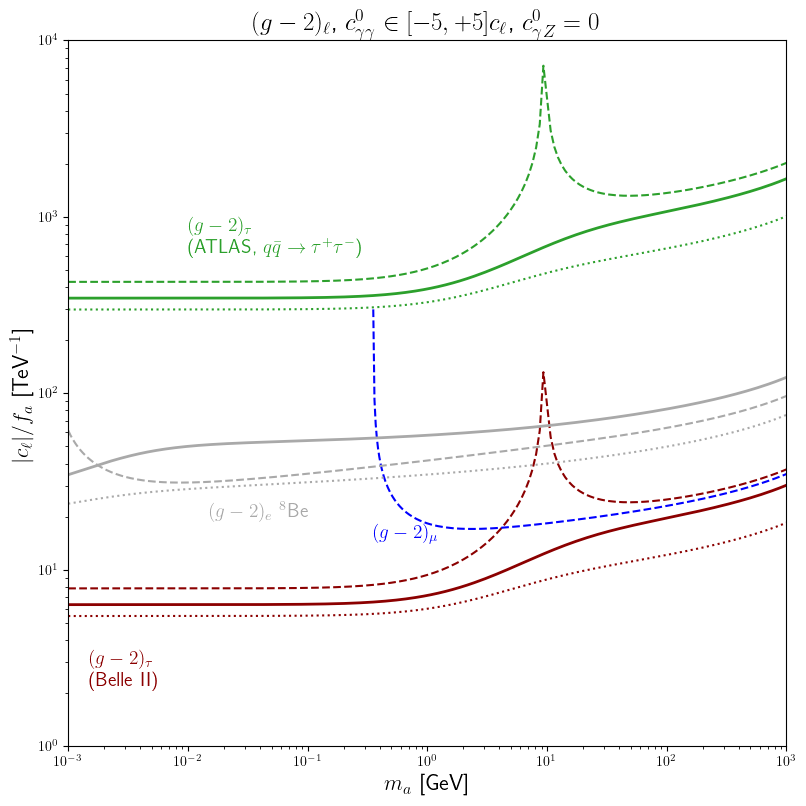

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
#plt.plot(ma, bound_CMS, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
#plt.fill_between(ma, bound_CMS, 1e7, alpha=0.2)
#plt.plot(ma, bound_ATLASPb, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
#plt.fill_between(ma, bound_ATLASPb, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2, c='tab:green')
plt.plot(ma, bound_ATLASpair_gg5p, ls='dashed', c='tab:green')
plt.plot(ma, bound_ATLASpair_gg5m, ls='dotted', c='tab:green')
plt.annotate(r'$(g-2)_\tau$' + '\n(ATLAS, ' + r'$q\bar{q}\to \tau^+\tau^-$)', (1e-2, 620), color='tab:green', fontsize=14)
#plt.fill_between(ma, bound_ATLASpair, 1e7, alpha=0.2)


plt.plot(ma, bound_BelleII, label=r'$(g-2)_\tau$ Belle-II (projected)', lw=2, c='darkred')
plt.plot(ma, bound_BelleII_gg5p, ls='dashed', c='darkred')
plt.plot(ma, bound_BelleII_gg5m, ls='dotted', c='darkred')
plt.annotate(r'$(g-2)_\tau$' + '\n(Belle II)', (1.5e-3, 2.2), color='darkred', fontsize=14)

plt.plot(ma, bound_amu_WA24, label=r'$(g-2)_\mu$ World Average 2024', lw=2, c='b')
plt.plot(ma, bound_amu_WA24_gg5p, ls='dashed', c='b')
plt.plot(ma, bound_amu_WA24_gg5m, ls='dotted', c='b')
plt.annotate(r'$(g-2)_\mu$', (0.35, 15), color='b', fontsize=14)
#plt.fill_between(ma_amu, bound_amu_WA24, 1e7, alpha=0.2)

#plt.plot(ma, bound_ae_Cs, label=r'$(g-2)_e$ ${}^{133}$Cs', lw=2, c='k')
#plt.plot(ma, bound_ae_Cs_gg5p, ls='dashed', c='k')
#plt.plot(ma, bound_ae_Cs_gg5m, ls='dotted', c='k')
#plt.annotate(r'$(g-2)_e$ ${}^{133}$Cs', (1.2e-3, 90), color='k', fontsize=14)
#plt.fill_between(ma_ae_Cs, bound_ae_Cs, 1e7, alpha=0.2)

plt.plot(ma, bound_ae, label=r'$(g-2)_e$', lw=2, c='darkgray')
plt.plot(ma, bound_ae_gg5p, ls='dashed', c='darkgray')
plt.plot(ma, bound_ae_gg5m, ls='dotted', c='darkgray')
plt.annotate(r'$(g-2)_e$ ${}^8$Be', (1.5e-2, 20), color='darkgray', fontsize=14)
#plt.fill_between(ma_ae_8Be, bound_ae_8Be, 1e7, alpha=0.2)




plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell}|/f_a$ [TeV${}^{-1}$]', fontsize=16)
plt.title(r'$(g-2)_\ell$, $c_{\gamma\gamma}^0 \in [-5, +5] c_\ell$, $c_{\gamma Z}^0 = 0$', fontsize=18)
plt.xlim(1e-3, 1e3)
plt.ylim(1, 1e4)
#plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('g2_cgg.pdf')

In [53]:
pd.DataFrame({'ma_GeV': ma,
             'cl_g2e': bound_ae}).to_csv('../data/anomalous_moments/g2e.csv', index=False)

pd.DataFrame({'ma_GeV': ma,
             'cl_g2e+cgg': bound_ae_gg5m,
             'cl_g2e-cgg': bound_ae_gg5p,
             'cl_g2mu+cgg': bound_amu_WA24_gg5m,
             'cl_g2mu-cgg': bound_amu_WA24_gg5p,
             'cl_g2tauBII+cgg': bound_BelleII_gg5m,
             'cl_g2tauBII-cgg': bound_BelleII_gg5p,
             'cl_g2tauATLAS+cgg': bound_ATLASpair_gg5m,
             'cl_g2tauATLAS-cgg': bound_ATLASpair_gg5p,}).to_csv('../data/anomalous_moments/g2_cgg.csv', index=False)

In [54]:
ae_gZ5p = np.array(ae) + 5*np.array([a[0] for a in alist_gZ])
amu_gZ5p = np.array(amu) + 5*np.array([a[1] for a in alist_gZ])
atau_gZ5p = np.array(atau) + 5*np.array([a[2] for a in alist_gZ])

In [55]:
ae_gZ5m = np.array(ae) -5* np.array([a[0] for a in alist_gZ])
amu_gZ5m = np.array(amu) - 5*np.array([a[1] for a in alist_gZ])
atau_gZ5m = np.array(atau) - 5*np.array([a[2] for a in alist_gZ])

In [56]:
bound_ATLASPb_gZ5p = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau_gZ5p)))
bound_ATLASpair_gZ5p = np.sqrt(-(atau_ATLASpair-atau_SM)/abs(np.real(np.array(atau_gZ5p))))
bound_CMS_gZ5p = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau_gZ5p)))
bound_BelleII_gZ5p = np.sqrt(1e-6/abs(np.real(np.array(atau_gZ5p)))) # 0807.2366

In [57]:
ma_amu_gZ5p = []

bound_amu_WA24_gZ5p = []
bound_amu_WA24_m_gZ5p = []
bound_amu_WA24_2_gZ5p = []
bound_amu_WA24_2m_gZ5p = []
for m, a in zip(ma, amu_gZ5p):
    if np.real(a) > 0:
        bound_amu_WA24_gZ5p.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m_gZ5p.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2_gZ5p.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m_gZ5p.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
        ma_amu_gZ5p.append(m)

In [58]:
bound_ae_Cs_gZ5p = []
bound_ae_8Be_gZ5p = []
for m, a in zip(ma, ae_gZ5p):
    if np.real(a) < 0:
        bound_ae_Cs_gZ5p.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        bound_ae_8Be_gZ5p.append(float('nan'))
        #ma_ae_Cs_gZ5m.append(m)
    else:
        bound_ae_8Be_gZ5p.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        bound_ae_Cs_gZ5p.append(float('nan'))
        #ma_ae_8Be_gZ5m.append(m)

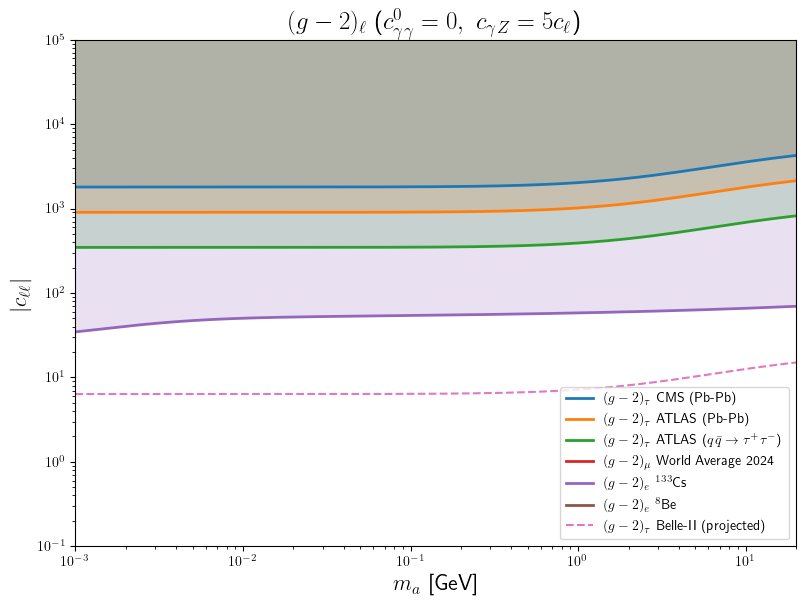

In [59]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ma, bound_CMS_gZ5p, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_CMS_gZ5p, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASPb_gZ5p, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_ATLASPb_gZ5p, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair_gZ5p, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(ma, bound_ATLASpair_gZ5p, 1e7, alpha=0.2)



plt.plot(ma_amu_gZ5p, bound_amu_WA24_gZ5p, label=r'$(g-2)_\mu$ World Average 2024', lw=2)
plt.fill_between(ma_amu_gZ5p, bound_amu_WA24_gZ5p, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_Cs_gZ5p, label=r'$(g-2)_e$ ${}^{133}$Cs', lw=2)
plt.fill_between(ma, bound_ae_Cs_gZ5p, 1e7, alpha=0.2)

plt.plot(ma, bound_ae_8Be_gZ5p, label=r'$(g-2)_e$ ${}^{8}$Be', lw=2)
plt.fill_between(ma, bound_ae_8Be_gZ5p, 1e7, alpha=0.2)

plt.plot(ma, bound_BelleII_gZ5p, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')



plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\ell$ ($c_{\gamma\gamma}^0 = 0,\ c_{\gamma Z}=5 c_\ell$)', fontsize=18)
plt.xlim(1e-3, 2e1)
plt.ylim(0.1, 1e5)
plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('g2_lim_gZ5p.png')

In [60]:
bound_ATLASPb_gZ5m = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau_gZ5m)))
bound_ATLASpair_gZ5m = np.sqrt((atau_ATLASpair-atau_SM)/np.real(np.array(atau_gZ5m)))
bound_CMS_gZ5m = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau_gZ5m)))
bound_BelleII_gZ5m = np.sqrt(-1e-6/np.real(np.array(atau_gZ5m))) # 0807.2366

In [61]:
ma_amu_gZ5m = []

bound_amu_WA24_gZ5m = []
bound_amu_WA24_m_gZ5m = []
bound_amu_WA24_2_gZ5m = []
bound_amu_WA24_2m_gZ5m = []
for m, a in zip(ma, amu_gZ5m):
    if np.real(a) > 0:
        bound_amu_WA24_gZ5m.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m_gZ5m.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2_gZ5m.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m_gZ5m.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
        ma_amu_gZ5m.append(m)

In [62]:
#ma_ae_Cs_gZ5m = []
#ma_ae_8Be_gZ5m = []
bound_ae_Cs_gZ5m = []
bound_ae_8Be_gZ5m = []
for m, a in zip(ma, ae_gZ5m):
    if np.real(a) < 0:
        bound_ae_Cs_gZ5m.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        bound_ae_8Be_gZ5m.append(float('nan'))
        #ma_ae_Cs_gZ5m.append(m)
    else:
        bound_ae_8Be_gZ5m.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        bound_ae_Cs_gZ5m.append(float('nan'))
        #ma_ae_8Be_gZ5m.append(m)

In [ ]:
plt.axhline(0, c='k', lw=0.5)
plt.axhline(1, c='k', lw=0.5)
plt.semilogx(ma, [-np.real(alist_gZ5p[i][0])/np.real(ae_gZ5m[i]) for i in range(len(ae_gg5p))])
plt.semilogx(ma, [np.real(alist[i][0])/np.real(ae_gZ5m[i]) for i in range(len(ae_gg5p))])
plt.ylim(-2, 2)

In [ ]:
c2W = 1-s2W
alist_BB5 = [alep_gauge(m, 5, -5*(s2W**1.5*c2W**0.5/2)) for m in ma]

In [ ]:
ae_BB5p = np.array(ae) + np.array([a[0] for a in alist_BB5])
amu_BB5p = np.array(amu) + np.array([a[1] for a in alist_BB5])
atau_BB5p = np.array(atau) + np.array([a[2] for a in alist_BB5])

In [ ]:
bound_ATLASPb_BB5p = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau_BB5p)))
bound_ATLASpair_BB5p = np.sqrt(-(atau_ATLASpair-atau_SM)/abs(np.real(np.array(atau_BB5p))))
bound_CMS_BB5p = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau_BB5p)))
bound_BelleII_BB5p = np.sqrt(1e-6/abs(np.real(np.array(atau_BB5p)))) # 0807.2366

In [ ]:
ma_amu_BB5p = []

bound_amu_WA24_BB5p = []
bound_amu_WA24_m_BB5p = []
bound_amu_WA24_2_BB5p = []
bound_amu_WA24_2m_BB5p = []
for m, a in zip(ma, amu_BB5p):
    if np.real(a) > 0:
        bound_amu_WA24_BB5p.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m_BB5p.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2_BB5p.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m_BB5p.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
        ma_amu_BB5p.append(m)

In [ ]:
bound_ae_Cs_BB5p = []
bound_ae_8Be_BB5p = []
for m, a in zip(ma, ae_BB5p):
    if np.real(a) < 0:
        bound_ae_Cs_BB5p.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        bound_ae_8Be_BB5p.append(float('nan'))
        #ma_ae_Cs_gZ5m.append(m)
    else:
        bound_ae_8Be_BB5p.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        bound_ae_Cs_BB5p.append(float('nan'))
        #ma_ae_8Be_gZ5m.append(m)

In [ ]:
ae_BB5m = np.array(ae) - np.array([a[0] for a in alist_BB5])
amu_BB5m = np.array(amu) - np.array([a[1] for a in alist_BB5])
atau_BB5m = np.array(atau) - np.array([a[2] for a in alist_BB5])

In [ ]:
bound_ATLASPb_BB5m = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau_BB5m)))
bound_ATLASpair_BB5m = np.sqrt(-(atau_ATLASpair-atau_SM)/abs(np.real(np.array(atau_BB5m))))
bound_CMS_BB5m = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau_BB5m)))
bound_BelleII_BB5m = np.sqrt(1e-6/abs(np.real(np.array(atau_BB5m)))) # 0807.2366

In [ ]:
ma_amu_BB5m = []

bound_amu_WA24_BB5m = []
bound_amu_WA24_m_BB5m = []
bound_amu_WA24_2_BB5m = []
bound_amu_WA24_2m_BB5m = []
for m, a in zip(ma, amu_BB5m):
    if np.real(a) > 0:
        bound_amu_WA24_BB5m.append(np.sqrt((amu_WA24-amu_SM)/np.real(a)))
        bound_amu_WA24_m_BB5m.append(np.sqrt((amu_WA24_m-amu_SM_m)/np.real(a)))
        bound_amu_WA24_2_BB5m.append(np.sqrt((amu_WA24_2-amu_SM_2)/np.real(a)))
        bound_amu_WA24_2m_BB5m.append(np.sqrt((amu_WA24_2m-amu_SM_2m)/np.real(a)))
        ma_amu_BB5m.append(m)

In [ ]:
bound_ae_Cs_BB5m = []
bound_ae_8Be_BB5m = []
for m, a in zip(ma, ae_BB5m):
    if np.real(a) < 0:
        bound_ae_Cs_BB5m.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        bound_ae_8Be_BB5m.append(float('nan'))
        #ma_ae_Cs_gZ5m.append(m)
    else:
        bound_ae_8Be_BB5m.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        bound_ae_Cs_BB5m.append(float('nan'))
        #ma_ae_8Be_gZ5m.append(m)

In [ ]:
c2W = 1-s2W
alist_WW5 = [alep_gauge(m, 5, 5*(s2W**0.5*c2W**1.5/2)) for m in ma]

In [ ]:
(1-4*s2W)/(2*(s2W*c2W)**0.5)

In [ ]:
s2W**0.5*c2W**1.5/2

In [ ]:
s2W**1.5*c2W**0.5/2

In [ ]:
2/(s2W*c2W)**0.5

## Vector-like lepton doublet for $(g-2)_\mu$

In [200]:
def delta2(ma, fa):
    integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, ma**2/mmu**2), 0, 1)[0] for j in range(3))
    return 4*(-h1(ma**2/mmu**2)-2*alpha_e/np.pi*integral-6*alpha_e/np.pi*(2*np.log(4*np.pi*fa/mmu)-h2(ma**2/mmu**2)))

def delta1(ma, fa):
    return 2*alpha_e/np.pi*(2*np.log(4*np.pi*fa/mmu)-h2(ma**2/mmu**2))

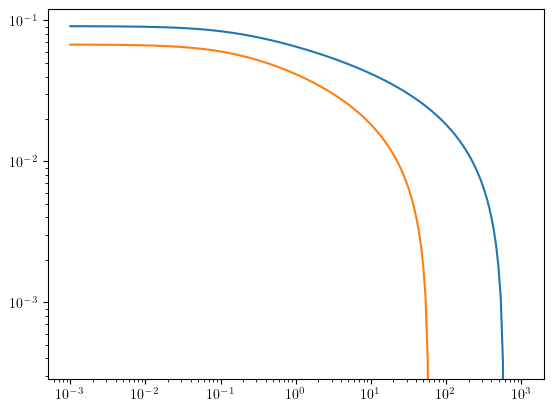

In [201]:
plt.loglog(ma, [delta1(m, 100) for m in ma])
plt.loglog(ma, [delta1(m, 10) for m in ma])

/home/jorge/.local/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/tmp/ipykernel_155315/2391852265.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, ma**2/mmu**2), 0, 1)[0] for j in range(3))


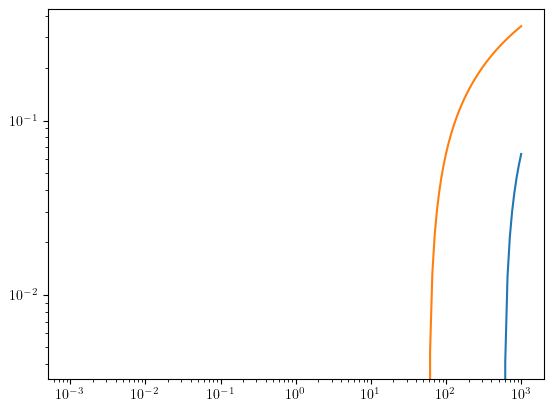

In [202]:
plt.loglog(ma, [delta2(m, 100) for m in ma])
plt.loglog(ma, [delta2(m, 10) for m in ma])

In [210]:
kappa = np.sqrt((amu_WA24-amu_SM)/(mmu/(4*np.pi*100))**2)
kappa_m = np.sqrt((amu_WA24_m-amu_SM_m)/(mmu/(4*np.pi*100))**2)

/home/jorge/.local/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/tmp/ipykernel_155315/2391852265.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, ma**2/mmu**2), 0, 1)[0] for j in range(3))
/tmp/ipykernel_155315/601039813.py:1: RuntimeWarning: invalid value encountered in sqrt
  plt.loglog(ma, [0.5*(-delta1(m, 100)+np.sqrt(delta1(m, 100)**2+4*delta2(m, 100

(0.001, 100.0)

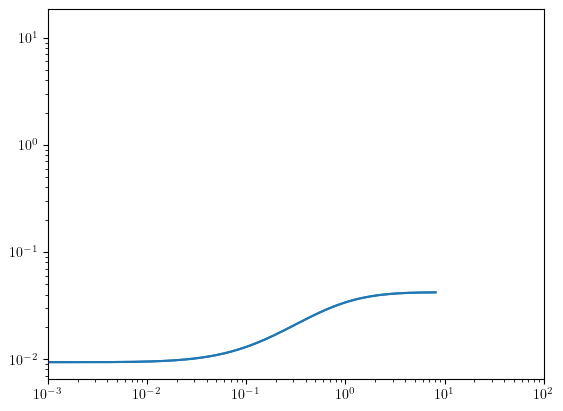

In [211]:
plt.loglog(ma, [0.5*(-delta1(m, 100)+np.sqrt(delta1(m, 100)**2+4*delta2(m, 100)*kappa))/delta2(m, 100) for m in ma])
plt.loglog(ma, [0.5*(-delta1(m, 100)+np.sqrt(delta1(m, 100)**2+4*delta2(m, 100)*kappa_m))/delta2(m, 100) for m in ma], c='tab:blue')
plt.xlim(1e-3, 1e2)

In [239]:
f_a = 50
sol =[0.5*(-delta1(m, 10)+np.sqrt(delta1(m, 10)**2+4*delta2(m, 10)*kappa))/delta2(m, 10) for m in ma]

/tmp/ipykernel_155315/2391852265.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, ma**2/mmu**2), 0, 1)[0] for j in range(3))
/tmp/ipykernel_155315/1016441541.py:2: RuntimeWarning: invalid value encountered in sqrt
  sol =[0.5*(-delta1(m, 10)+np.sqrt(delta1(m, 10)**2+4*delta2(m, 10)*kappa))/delta2(m, 10) for m in ma]


(0.001, 50)

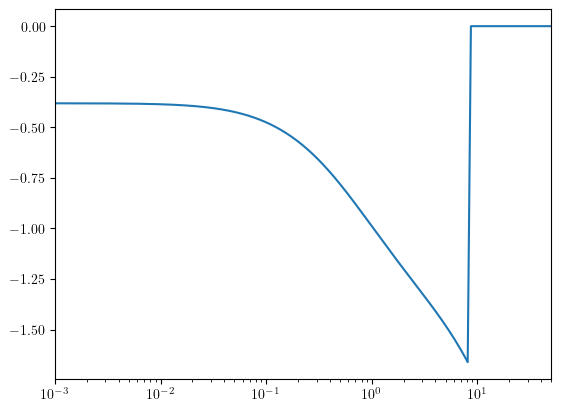

In [240]:
plt.semilogx(ma, np.imag(sol))
plt.xlim(ma[0], f_a)

In [241]:
sol_re = []
for s in sol:
    if np.imag(s) == 0:
        sol_re.append(np.real(s))
    else:
        sol_re.append(float('nan'))

In [242]:
sol_re

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [215]:
sQ = 3e-2
(sQ**2 * delta2(0.1, 100)+sQ * delta1(0.1, 100))/kappa

/tmp/ipykernel_155315/2391852265.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, ma**2/mmu**2), 0, 1)[0] for j in range(3))


(-0.0005843072704995195-7.793915236327626e-13j)

## $\tau$-philic scenario

In [ ]:
def alep_tp(ma):
    a = 0
    x = ma**2/mlep[2]**2
    integral = quad(lambda z: F(z*(1-z)*ma**2/mlep[2]**2, x), 0, 1)[0]
    a -= h1(x) # lepton-lepton-ALP loop
    a -= 2*alpha_e/np.pi*integral # 2 loops
    a *= mlep[2]**2/(4*np.pi*fa)**2
    return a

In [ ]:
atau_tp = [alep_tp(m) for m in ma]

In [ ]:
def alep_gauge(ma, cgg, cgZ, mu=1000):
    i = 2
    return mlep[i]**2/fa**2*alpha_e/(8*np.pi**3)*(cgg*(np.log(mu**2/mlep[i]**2)-h2(ma**2/mlep[i]**2))+cgZ*(1-4*s2W)/8*(np.log(mu**2/mZ**2)-1.5) )

In [ ]:
alist_gg = [alep_gauge(m, 1, 0) for m in ma]
alist_gZ = [alep_gauge(m, 0, 1) for m in ma]

In [ ]:
atau_tp = np.array(atau_tp) - np.array(alist_gg) - (1-4*s2W)/(2*s2W**0.5*c2W**0.5)*np.array(alist_gZ)

In [ ]:
plt.semilogx(ma, [np.real(a) for a in atau_tp])
plt.semilogx(ma, [np.imag(a) for a in atau_tp])

In [ ]:
bound_ATLASPb_tp = np.sqrt(-(atau_ATLASPb-atau_SM)/abs(np.real(np.array(atau_tp))))
bound_ATLASpair_tp = np.sqrt(-(atau_ATLASpair-atau_SM)/abs(np.real(np.array(atau_tp))))
bound_CMS_tp = np.sqrt(-(atau_CMS-atau_SM)/abs(np.real(np.array(atau_tp))))
bound_BelleII_tp = np.sqrt(1e-6/abs(np.real(np.array(atau_tp)))) # 0807.2366

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ma, bound_CMS_tp, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_CMS_tp, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASPb_tp, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_ATLASPb_tp, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair_tp, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(ma, bound_ATLASpair_tp, 1e7, alpha=0.2)

plt.plot(ma, bound_BelleII_tp, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')

plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\tau\tau}|$', fontsize=16)
plt.title(r'$(g-2)_\ell$ ($\tau$-philic)', fontsize=18)
plt.xlim(1e-3, 1e3)
plt.ylim(0.1, 1e5)
plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('g2_lim_tp.png')

In [ ]:
(bound_BelleII_tp[-1]/bound_BelleII[-1])**2

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(ma, bound_BelleII, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')
plt.plot(ma, bound_BelleII_tp, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')
plt.xlim(1e-3, 1e3)
plt.ylim(0.1, 1e5)

In [ ]:
pd.DataFrame({'ma_GeV': ma, 'ctau_ATLAS': bound_ATLASpair_tp, 'ctau_BelleII': bound_BelleII_tp}).to_csv('../data/anomalous_moments/g2tau_tau.csv')